#### iris 데이터셋 활용 꽃잎 너비 예측 모델
- 데이터셋 : iris.csv에서 2개 Feature 사용
- 구현 프레임 워크 : Pytorch

- [1] 모듈 로딩 및 데이터 준비

In [253]:
# 모듈 로딩
import torch                        # 텐서 및 수치 계산 함수 관련 모듈
import torch.nn as nn               # 인공신경만 관련 모듈
import torch.nn.functional as F        # 손실, 거리 등 함수 관련 모듈
import torch.optim as optimizer     # 최적화 기법 관련 모듈

import pandas as pd                 # 데이터 파일 분석 관련 모듈
from sklearn.model_selection import train_test_split

In [254]:
torch.manual_seed(1)

In [255]:
# 데이터 로딩 : CSV => DataFrame
DATA_FILE = '../../Data/iris.csv'

irisDF = pd.read_csv(DATA_FILE, usecols = [0, 1, 2, 3])
irisDF.head(2)

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


[2] 모델 준비
- 학습방법 : 지도 학습 -> 회귀
- 알고리즘 : 선형관계 => 선형 모델 ==> nn.Linear


In [256]:
# in_features :  petal.length 1개
# out_features : petal.width 1개
model = nn.Linear(3, 1)

In [257]:
# 가중치와 절편 확인
for name, param in model.named_parameters():
    print(f"[{name}] {param}\n")

[weight] Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True)

[bias] Parameter containing:
tensor([0.2710], requires_grad=True)



[3] 최적화 인스턴스 준비

In [258]:
### 모델의 가중치와 절편을 최적화 ==> 인스턴스에 전달
adam_optim = optimizer.Adam(model.parameters(), lr = 0.1)

[4] 학습 ==> 개발자가 구현

-[4-1] 데이터셋 Tensor화 진행 : 데이터 준비 시 진행 하거나 또는 학습 전 진행

In [259]:
featureTS = torch.from_numpy(irisDF[irisDF.columns[:-1]].values).float()
featureTS.shape

torch.Size([150, 3])

In [260]:
targetTS = torch.from_numpy(irisDF[['petal.width']].values).float()
targetTS.shape

torch.Size([150, 1])

In [261]:
# Train & Test
X_train, X_test, y_train, y_test = train_test_split(featureTS, 
                                                    targetTS,
                                                    test_size = 0.2)

# Train & Valid
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.2)

print(f"[FEATURE] TRAIN {X_train.shape}, TEST {X_test.shape}, VAL {X_val.shape}")
print(f"[TARGET]  TRAIN {y_train.shape}, TEST {y_test.shape}, VAL {y_val.shape}")


[FEATURE] TRAIN torch.Size([96, 3]), TEST torch.Size([30, 3]), VAL torch.Size([24, 3])
[TARGET]  TRAIN torch.Size([96, 1]), TEST torch.Size([30, 1]), VAL torch.Size([24, 1])


- [4-2] 학습진행 
    * 학습 횟수 결정 ==> 에포크 설정
    * 학습 결과 저장 ==> 손실 저장 변수 

In [262]:
EPOCH = 1000

In [263]:
## 테스트 / 검증 함수
# ==> 가중치, 절편 업데이트 X, 최적화 미진행
# ==> 현재 가중치와 절편값으로 테스트 진행
# 모델 학습 함수
def testing(testTS, targetTS, kind = 'Val'):

    with torch.no_grad():       # 가중치 및 절편 업데이트 진행 X
        # -(1) 학습진행 - forward
        pre_y = model(testTS)

        # -(2) 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
    
        # -(4) 학습결과 출력 및 저장
        print(f"[{kind}] LOSS : {loss}")

    return loss


In [264]:
# 모델 학습 함수
def training(featureTS, targetTS, valTS, valTargetTS):
    loss_history = [[], []]

    for epoch in range(EPOCH + 1):
        # -(1) 학습진행 - forward
        pre_y = model(featureTS)

        # -(2) 오차계산 - 손실함수
        loss = F.mse_loss(pre_y, targetTS)
        loss_history[0].append(loss.item())

        # -(3) 최적화 - 가중치, 절편 업데이트 backward
        adam_optim.zero_grad()
        loss.backward()
        adam_optim.step()


        # -(4) 검증 - 모델이 제대로 만들어지는 검사용
        val_loss = testing(valTS, valTargetTS)   
        loss_history[1].append(val_loss.item())

        # -(5) 학습결과 출력 및 저장
        print(f"[{epoch}/{EPOCH}] LOSS : {loss}")

    return loss_history

In [265]:
# 모델 학습 진행
loss = training(X_train, y_train, X_val, y_val)

[Val] LOSS : 1.1829973459243774
[0/1000] LOSS : 0.6835171580314636
[Val] LOSS : 0.6461472511291504
[1/1000] LOSS : 1.1568652391433716
[Val] LOSS : 0.43170151114463806
[2/1000] LOSS : 0.5904416441917419
[Val] LOSS : 0.6741830706596375
[3/1000] LOSS : 0.3529602289199829
[Val] LOSS : 0.6074384450912476
[4/1000] LOSS : 0.6047390103340149
[Val] LOSS : 0.3380957841873169
[5/1000] LOSS : 0.5391114950180054
[Val] LOSS : 0.23941917717456818
[6/1000] LOSS : 0.27468129992485046
[Val] LOSS : 0.31346023082733154
[7/1000] LOSS : 0.2059662938117981
[Val] LOSS : 0.311316579580307
[8/1000] LOSS : 0.3208269774913788
[Val] LOSS : 0.19555753469467163
[9/1000] LOSS : 0.33638930320739746
[Val] LOSS : 0.12779302895069122
[10/1000] LOSS : 0.20706592500209808
[Val] LOSS : 0.18488092720508575
[11/1000] LOSS : 0.11215237528085709
[Val] LOSS : 0.25704512000083923
[12/1000] LOSS : 0.14734545350074768
[Val] LOSS : 0.22735953330993652
[13/1000] LOSS : 0.21041519939899445
[Val] LOSS : 0.13188450038433075
[14/1000] LO

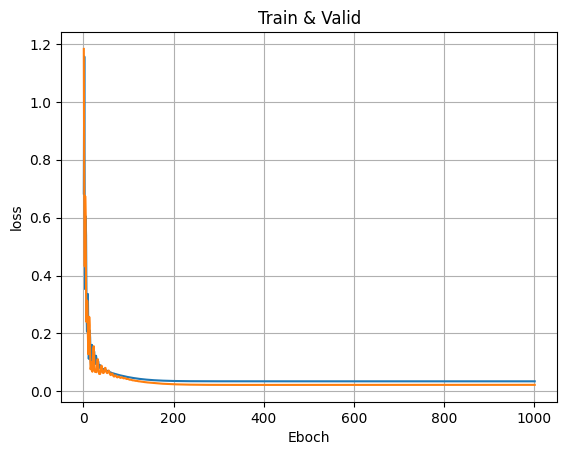

In [266]:
# 학습 후 loss 시각화
import matplotlib.pyplot as plt

plt.plot(range(1, 1002), loss[0], label = 'Train')
plt.plot(range(1, 1002), loss[1], label = 'Val')
plt.title("Train & Valid")
plt.grid()
plt.xlabel('Eboch')
plt.ylabel('loss')
plt.show()